<a href="https://colab.research.google.com/github/aditibansal17/Bird_Classification/blob/main/Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uploading kaggle.json

In [ ]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


setting up environment

In [ ]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

importing fastai vision library and ignoring all the unnecessary warnings

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Downloading dataset

In [ ]:
!kaggle datasets download -d gpiosenka/100-bird-species

 99% 1.16G/1.17G [00:26<00:00, 48.0MB/s]
100% 1.17G/1.17G [00:27<00:00, 46.4MB/s]


unzipping dataset

In [ ]:
!unzip "*.zip"

Streaming output truncated to the last 5000 lines.
  inflating: train/TURQUOISE MOTMOT/043.jpg  
  inflating: train/TURQUOISE MOTMOT/044.jpg  
  inflating: train/TURQUOISE MOTMOT/045.jpg  
  inflating: train/TURQUOISE MOTMOT/046.jpg  
  inflating: train/TURQUOISE MOTMOT/047.jpg  
  inflating: train/TURQUOISE MOTMOT/048.jpg  
  inflating: train/TURQUOISE MOTMOT/049.jpg  
  inflating: train/TURQUOISE MOTMOT/050.jpg  
  inflating: train/TURQUOISE MOTMOT/051.jpg  
  inflating: train/TURQUOISE MOTMOT/052.jpg  
  inflating: train/TURQUOISE MOTMOT/053.jpg  
  inflating: train/TURQUOISE MOTMOT/054.jpg  
  inflating: train/TURQUOISE MOTMOT/055.jpg  
  inflating: train/TURQUOISE MOTMOT/056.jpg  
  inflating: train/TURQUOISE MOTMOT/057.jpg  
  inflating: train/TURQUOISE MOTMOT/058.jpg  
  inflating: train/TURQUOISE MOTMOT/059.jpg  
  inflating: train/TURQUOISE MOTMOT/060.jpg  
  inflating: train/TURQUOISE MOTMOT/061.jpg  
  inflating: train/TURQUOISE MOTMOT/062.jpg  
  inflating: train/TURQUOISE 

making a directory to store all the test images

In [ ]:
os.makedirs('test1')

importing important libraries

In [ ]:
#import dlib
#import cv2
#from imutils import face_utils
from PIL import Image

storing images in test1 folder

In [ ]:
inm=[]
j=0
tfiles=os.listdir("/content/test")
for file in tfiles:
  tfile1=os.listdir("/content/test/"+file)
  i=0
  for x in tfile1:
    if i==400:
      break
    else:
      colorImage  = Image.open("/content/test/"+file+"/"+x)
      #os.makedirs("/content/itsnotme/anushka"+str(j)+".jpg")
      colorImage.save("/content/test1/"+str(j)+".jpg")
      i+=1
      j+=1

In [ ]:
my_dir = "/content/drive/MyDrive/birds/models/"

loading our model with the help of load_learner function

In [ ]:
predictor = load_learner(my_dir)

defining prediction function that takes one image as input and return the predicted class

In [ ]:
def my_predictor(img):
  test_img =open_image(img)
  pred_class,pred_idx,outputs=predictor.predict(test_img)
  return pred_class

passing an image to the my_predictor function

YELLOW CACIQUE


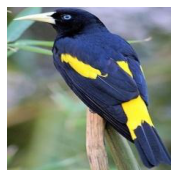

In [ ]:
idx = 0;
print(my_predictor("/content/test1/100.jpg"))
img = open_image("/content/test1/100.jpg")
img.show()

creating video of our predictions

In [ ]:
import cv2
test_files=os.listdir("/content/test1/")
os.makedirs("test_result",exist_ok=True)
i=0
for test_file in test_files:
  img=cv2.imread("/content/test1/"+test_file)
  cv2.imwrite("temp.jpg",img)
  ans_text=my_predictor("temp.jpg")
  font = cv2.FONT_HERSHEY_SIMPLEX 
  i+=1
  org = (0, 50) 
  fontScale = 1
  color = (250, 0, 0) 
  thickness = 2
  img = cv2.putText(img, str(ans_text), org, font,fontScale, color, thickness, cv2.LINE_AA) 
  cv2.imwrite("test_result/"+str(i)+".jpg", img)

In [ ]:
%cd "test_result"
!ffmpeg -framerate 1 -pattern_type glob -i '*.jpg' \-c:v libx264 -r 1 -pix_fmt yuv420p ../final_output.mp4
%cd ..

/content/test_result
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable

In [ ]:
!pip install -U kora
from kora.drive import upload_public

     |████████████████████████████████| 57 kB 2.6 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 


In [ ]:
url = upload_public('final_output.mp4')

In [ ]:
url

'https://drive.google.com/uc?id=1-pR69H87jzD1DQ4P1o1Wdv1OQJsCqfRb'

In [ ]:
from IPython.display import HTML
HTML(f"""<video src={url} width=500 controls/>""")